In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("C:/Users/quinc/Downloads/Mall_Customers.csv")

In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis 

In [35]:
# Univariate Analysis - only looking at one variable

In [36]:
df.describe() #looking at basic statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

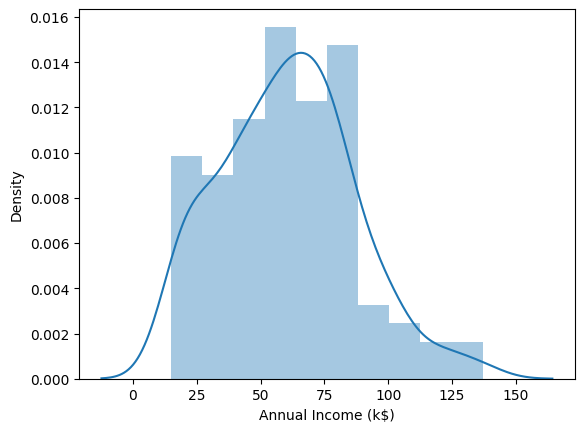

In [37]:
sns.distplot(df['Annual Income (k$)']) #plotting the column 'annual income' inside the dataframe

In [38]:
#using numerical variable for univariate analysis

In [39]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

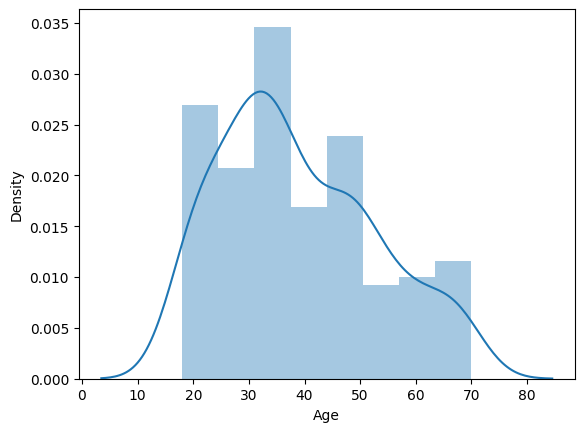

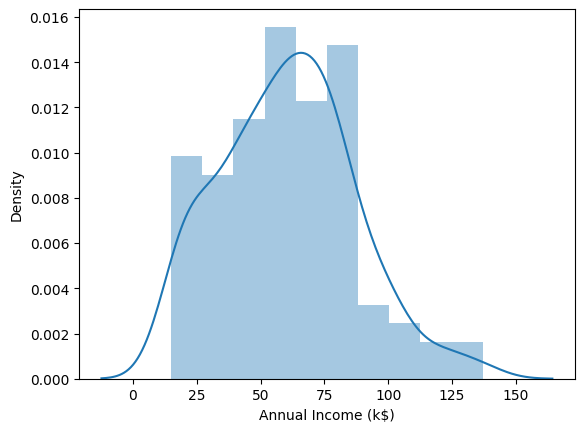

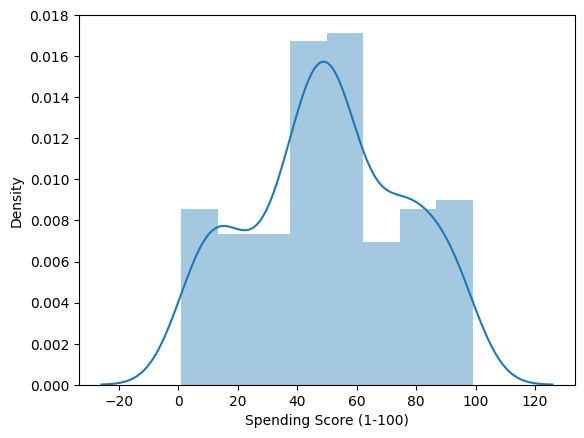

In [40]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

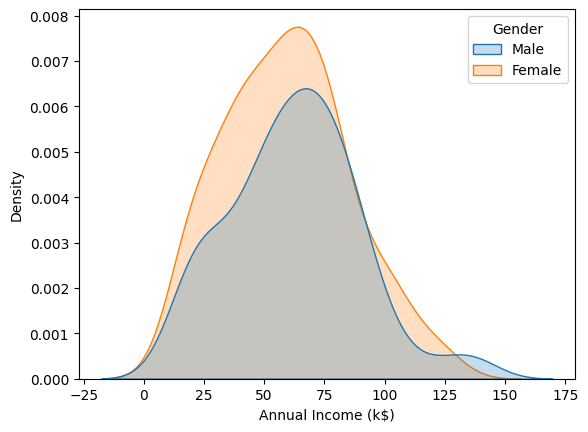

In [41]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

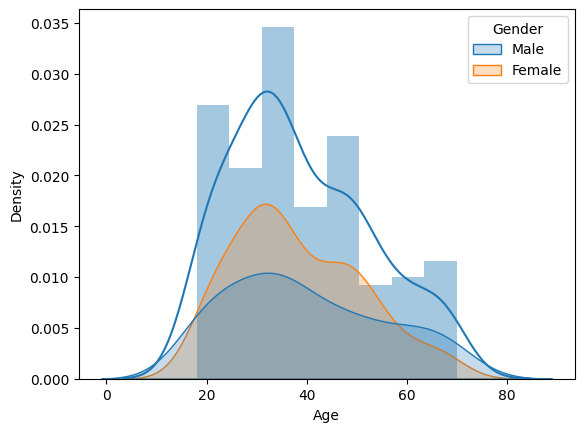

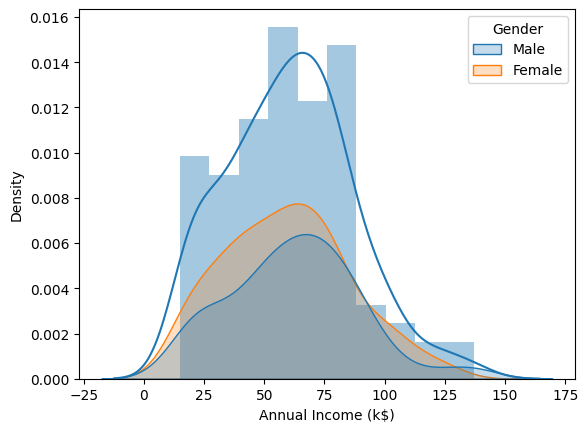

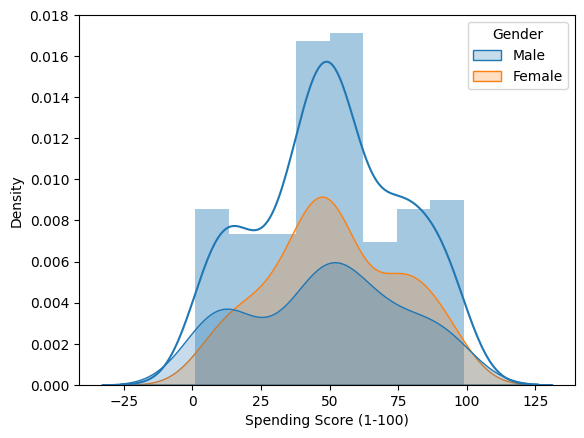

In [42]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.distplot(df[i])
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)

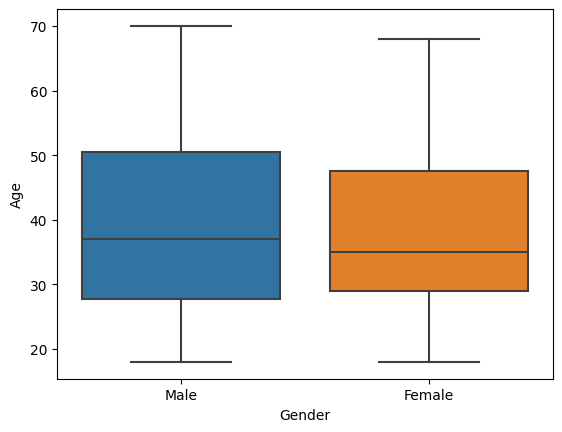

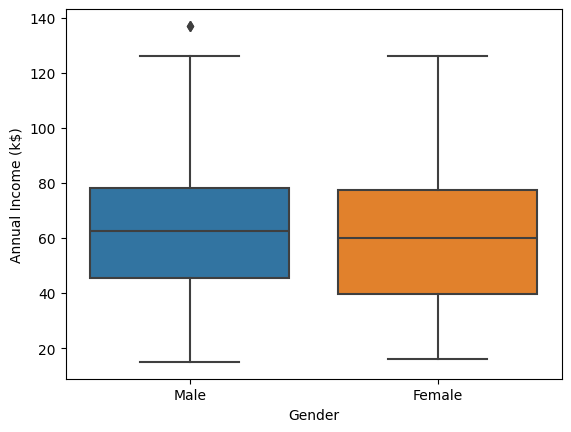

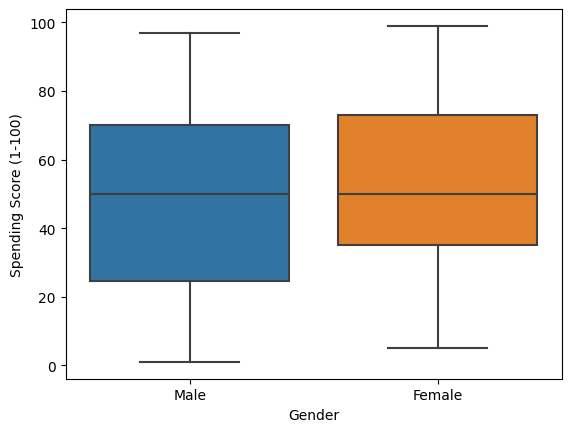

In [43]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [44]:
df ['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [45]:
df ['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

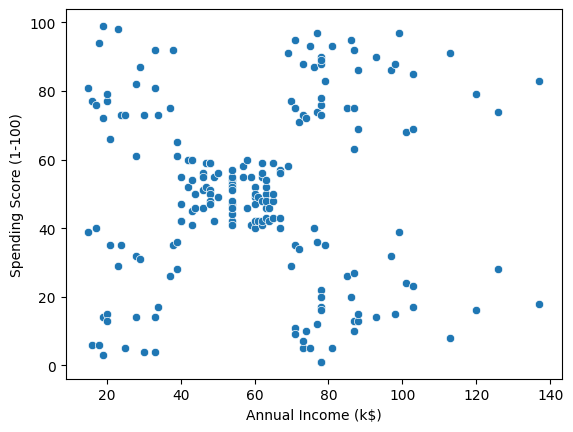

In [46]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [47]:
#From the scatterlot alone, we already have see some scatters (almost 6)

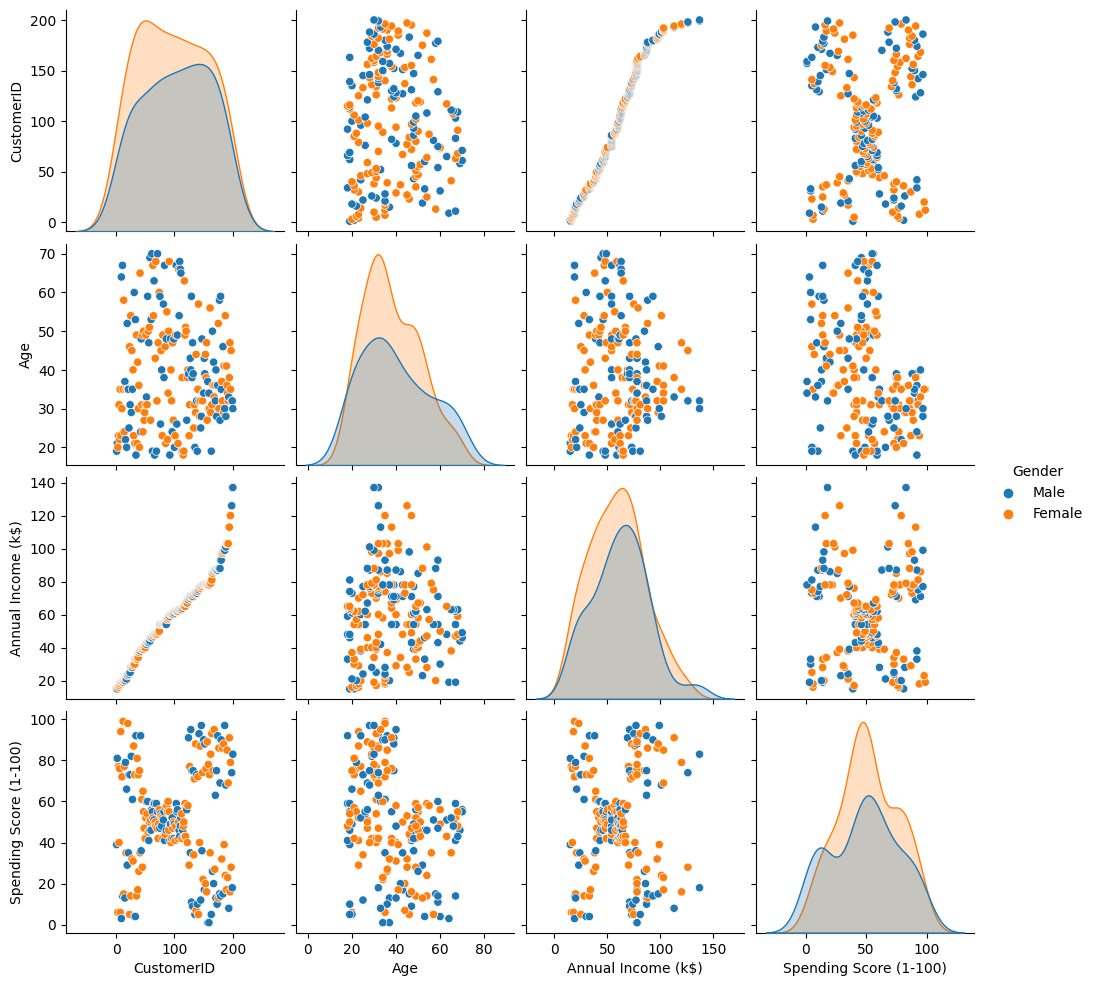

In [48]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df, hue='Gender')

In [49]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [50]:
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
numeric_df = df[numeric_columns]

In [51]:
numeric_df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

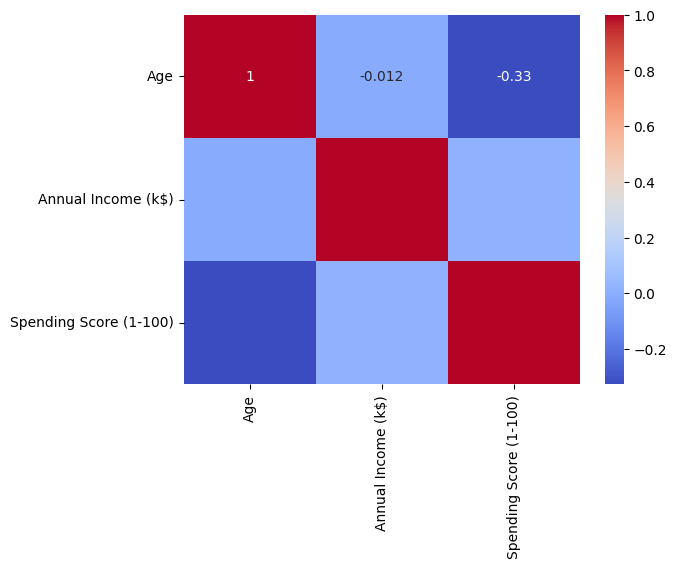

In [52]:
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm')

# Clustering = Univariate, Bivariate, Multivariate

In [53]:
import sklearn
print(sklearn.__version__)

1.3.0


In [54]:
from sklearn.cluster import KMeans

In [55]:
clustering1 = KMeans()

In [56]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans()

In [57]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6,
       6, 6])

In [106]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,2


In [59]:
df['Income Cluster'].value_counts()

Income Cluster
0    40
1    36
4    36
7    26
3    24
5    18
2    14
6     6
Name: count, dtype: int64

In [60]:
clustering1.inertia_

2862.250427350428

In [64]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [66]:
inertia_scores=[]

[137277.28000000003,
 48660.88888888888,
 23517.330930930926,
 13278.112713472488,
 8667.679614837509,
 5050.9047619047615,
 3931.9880952380954,
 2857.441697191697,
 2171.4722222222226,
 1758.1453823953825]

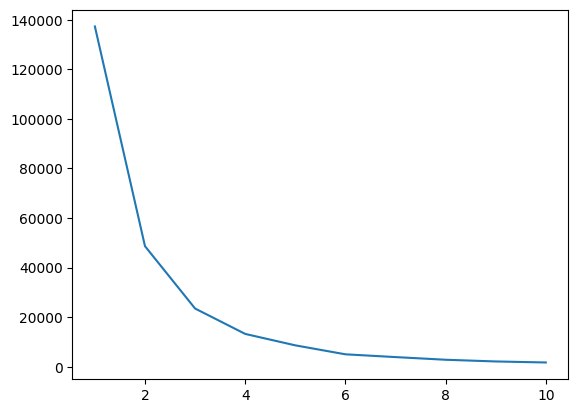

In [68]:
plt.plot(range (1,11),inertia_scores)

In [ ]:
#looks like the elbow starts at 3

In [103]:
clustering01 = KMeans(n_clusters=3)

In [104]:
clustering01.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [105]:
clustering01.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [107]:
df['Income Cluster'] = clustering01.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,2


In [108]:
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    74
2    36
Name: count, dtype: int64

In [109]:
clustering01.inertia_

23517.330930930926

In [121]:
inertia_scores01=[]
for i in range(1,11):
    kmeans01=KMeans(n_clusters=i)
    kmeans01.fit(df[['Annual Income (k$)']])
    inertia_scores01.append(kmeans01.inertia_)

In [124]:
print(inertia_scores01)

[137277.28000000003, 48660.88888888888, 23528.152173913048, 13278.112713472488, 8481.496190476191, 5081.484660267269, 3941.4163614163613, 2862.833028083028, 2173.287445887446, 1736.5656510156512]


In [127]:
print (len(inertia_scores01))

10


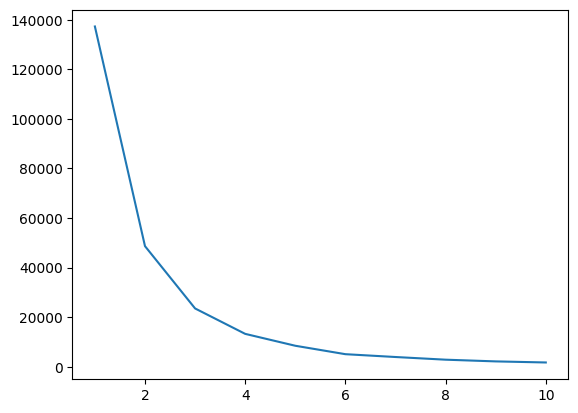

In [128]:
plt.plot(range (1,11),inertia_scores01)

In [69]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [129]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [ ]:
#Bivariate clustering

In [134]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,0


In [135]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

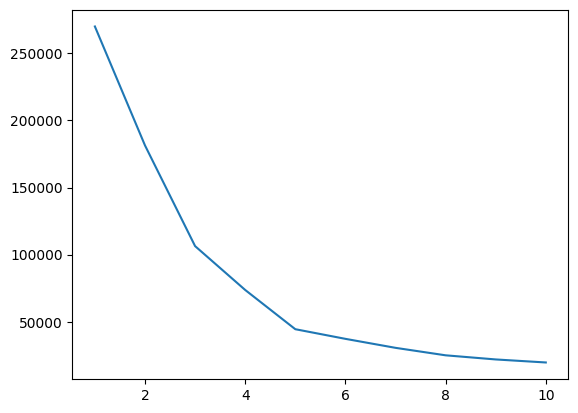

In [136]:
plt.plot(range(1,11),inertia_scores2)

In [137]:
#looks like the elbow starts at 5

In [138]:
clustering02 = KMeans(n_clusters=5)
clustering02.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering02.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


In [139]:
inertia_scores02=[]
for i in range(1,11):
    kmeans02=KMeans(n_clusters=i)
    kmeans02.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores02.append(kmeans02.inertia_)

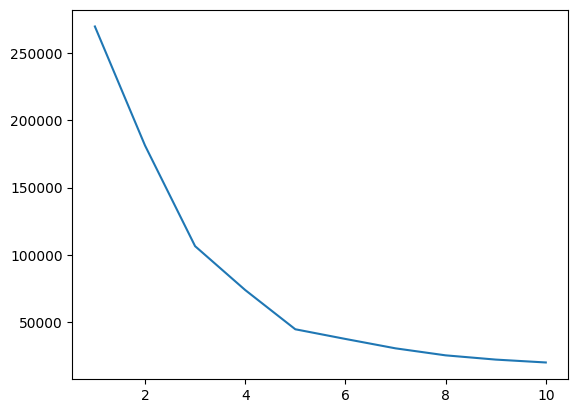

In [140]:
plt.plot(range(1,11),inertia_scores02)

In [ ]:
#some visualization

In [141]:
centers = pd.DataFrame(clustering02.cluster_centers_)
centers.columns = ['x','y']

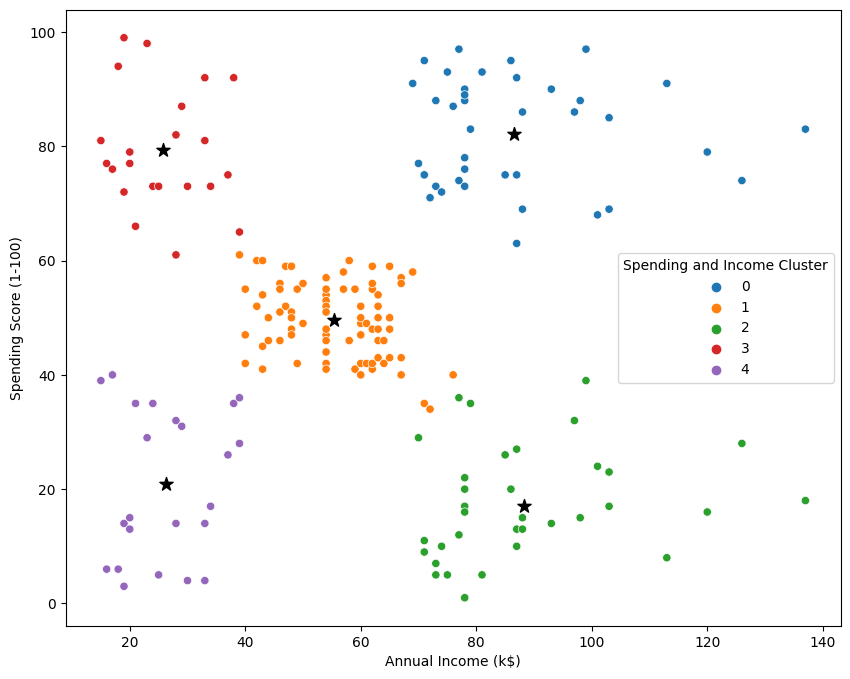

In [142]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [143]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.592593,0.407407
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [144]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,42.716049,55.296296,49.518519
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [145]:
#multivariate clustering

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scale = StandardScaler()

In [148]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


In [149]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,4,True
1,2,21,15,81,1,3,True
2,3,20,16,6,1,4,False
3,4,23,16,77,1,3,False
4,5,31,17,40,1,4,False


In [150]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [151]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [152]:
dff = scale.fit_transform(dff)

In [153]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head

<bound method NDFrame.head of             0         1         2         3
0   -1.424569 -1.738999 -0.434801  1.128152
1   -1.281035 -1.738999  1.195704  1.128152
2   -1.352802 -1.700830 -1.715913 -0.886405
3   -1.137502 -1.700830  1.040418 -0.886405
4   -0.563369 -1.662660 -0.395980 -0.886405
..        ...       ...       ...       ...
195 -0.276302  2.268791  1.118061 -0.886405
196  0.441365  2.497807 -0.861839 -0.886405
197 -0.491602  2.497807  0.923953  1.128152
198 -0.491602  2.917671 -1.250054  1.128152
199 -0.635135  2.917671  1.273347  1.128152

[200 rows x 4 columns]>

In [154]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

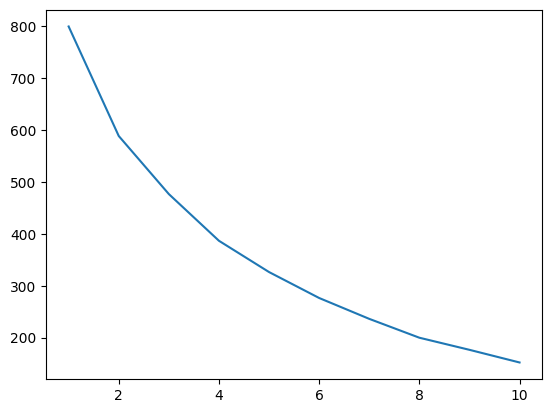

In [155]:
plt.plot(range(1,11),inertia_scores3)

In [102]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,3,2
1,2,Male,21,15,81,3,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,3,1
4,5,Female,31,17,40,3,2
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,6,4
196,197,Female,45,126,28,6,0
197,198,Male,32,126,74,6,4
198,199,Male,32,137,18,6,0


In [156]:
df.to_csv('Mall Customer Clustering.csv')